In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import sys

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier



In [2]:
Main_df = pd.read_csv('Data\\Main_Data_GS\\df_whole.csv')

In [3]:
Main_df.head()

,Domain,IP,Have_At,Length(URL),Depth(URL),Redirection,https,TinyURL,Prefix/Suffix,DNS,Web_Traffic,DAge,DEnd,iframe,MouseOver,RightClick,WebForwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
Main_df = Main_df.drop(['Domain'], axis = True)

In [5]:
Main_df.shape

(10000, 17)

In [6]:
Main_df.isna().sum()

IP               0
Have_At          0
Length(URL)      0
Depth(URL)       0
Redirection      0
https            0
TinyURL          0
Prefix/Suffix    0
DNS              0
Web_Traffic      0
DAge             0
DEnd             0
iframe           0
MouseOver        0
RightClick       0
WebForwards      0
Label            0
dtype: int64

In [7]:
Main_df.describe()

,IP,Have_At,Length(URL),Depth(URL),Redirection,https,TinyURL,Prefix/Suffix,DNS,Web_Traffic,DAge,DEnd,iframe,MouseOver,RightClick,WebForwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


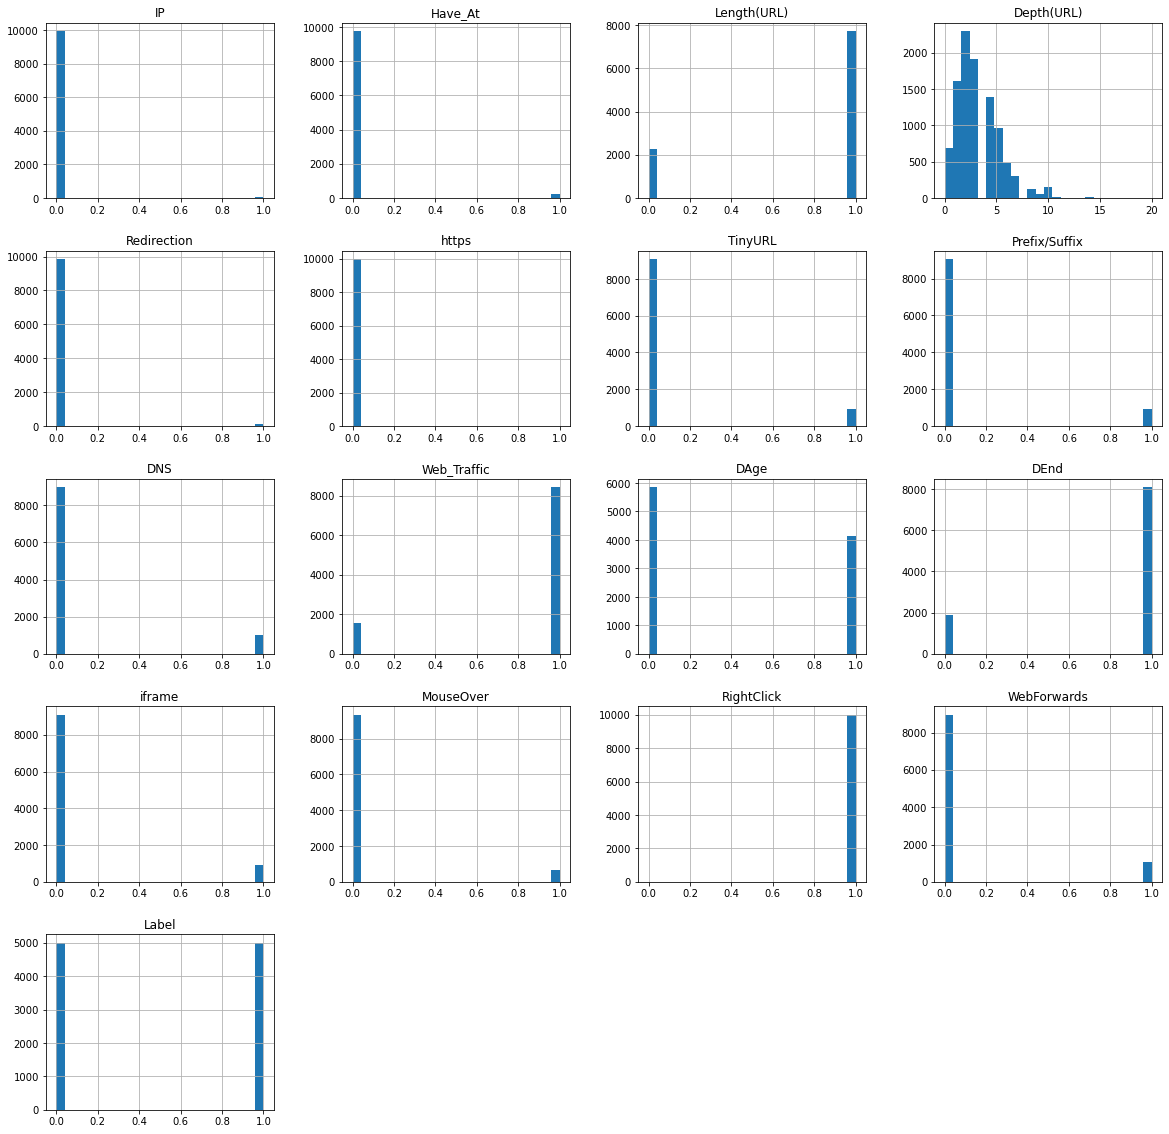

In [8]:
Main_df.hist(bins = 25, figsize = (20,20))
plt.show()

In [9]:
Main_df = Main_df.sample(frac=1).reset_index(drop=True)

In [10]:
y = Main_df['Label']
x = Main_df.drop('Label',axis = True)

# Train,Test,Split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
x_train.shape,y_train.shape

((7000, 16), (7000,))

 # Models

In [12]:
# SVM 
svm = SVC(kernel='linear',C = 10,random_state = 42)
svm.fit(x_train,y_train)

SVC(C=10, kernel='linear', random_state=42)

In [13]:
testSvm = svm.predict(x_test)
trainSvm = svm.predict(x_train)

In [14]:
testSvm_accuracy = accuracy_score(y_train,trainSvm)
trainSvm_accuracy = accuracy_score(y_test,testSvm)
print("Train Accuracy",trainSvm_accuracy*100)
print("Test Accuracy",testSvm_accuracy*100)

Train Accuracy 80.63333333333334
Test Accuracy 80.02857142857142


In [15]:
# Decision Tree (DT)
DT = DecisionTreeClassifier(max_depth = 12)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [16]:
testTree = DT.predict(x_test)
trainTree = DT.predict(x_train)

trainTree_accuracy = accuracy_score(y_train,trainTree)
testTree_accuracy = accuracy_score(y_test,testTree)
print("Train Accuracy",trainTree_accuracy*100)
print("Test Accuracy",testTree_accuracy*100)

Train Accuracy 85.3
Test Accuracy 84.39999999999999


In [17]:
# Random Forest
RF = RandomForestClassifier(max_depth=15,random_state = 42) 
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [18]:
testForest = RF.predict(x_test)
trainForest = RF.predict(x_train)

trainForest_accuracy = accuracy_score(y_train,trainForest)
testForest_accuracy = accuracy_score(y_test,testForest)
print('Train Accuracy',trainForest_accuracy)
print("Test Accuracy",testForest_accuracy)

Train Accuracy 0.8664285714285714
Test Accuracy 0.8596666666666667


In [30]:
# XGBoost Classifier
x_boost = XGBClassifier(learning_rate =  0.6,max_depth = 8)
x_boost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [31]:
test_xg = x_boost.predict(x_test)
train_xg = x_boost.predict(x_train)

trainxg_accuracy = accuracy_score(y_train,train_xg)
testxg_accuracy = accuracy_score(y_test,test_xg)
print('Train Accuracy',trainxg_accuracy)
print("Test Accuracy",testxg_accuracy)

Train Accuracy 0.8674285714285714
Test Accuracy 0.86


In [24]:
def predict_phishing(Main_df):
    url_length = len(Main_df['url'])
    num_dots = Main_df['url'].count('.')
    num_subdomains = len(re.findall('\.', Main_df['url'])) - 1
    features = [url_length, num_dots, num_subdomains]
    message = {'features': features}
    sys.stdout.write(json.dumps(message))
    sys.stdout.flush()
    response = sys.stdin.readline()
    return response.strip()

while True:
    try:
        line = sys.stdin.readline().strip()
        if not line:
            break
        data = json.loads(line)
        if 'url' in data:
            response = predict_phishing(Main_df)
            sys.stdout.write(response + '\n')
            sys.stdout.flush()
    except Exception as e:
        sys.stderr.write(str(e) + '\n')
        sys.stderr.flush()